# 版本 1.0.0.4

- 下载缓存判断
- 文本可视化探索
  - 文本长度分布可视化，最佳截断长度计算
  - 文本词云可视化
- 增加 preprocessing 处理过程函数
- 增加中文分词器
  - 单字切词
  - 分词切词包括：jieba

## 下载缓存判断

所有与下载相关的函数，在真实请求网络之前，会进行本地缓存的判断。

默认缓存地址为 /Users/zhangchunyang/.cache/datasetstore/datasets/。

## 文本可视化探索(EDA)

### 文本长度分布可视化及最佳长度预测

In [1]:
from datasetstore import load_dataset

dataset = load_dataset("chinese-hotel-review")

✅✅✅✅✅✅✅✅✅✅ 下载完成


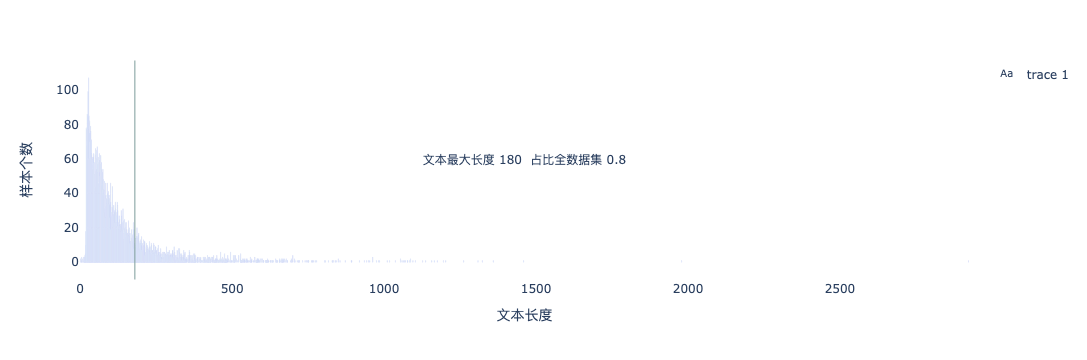

In [20]:
from datasetstore.eda.text import length_distribution

length_distribution(dataset, 'review', 0.8)

### 文本词云可视化

  0%|          | 0/8 [00:00<?, ?ba/s]

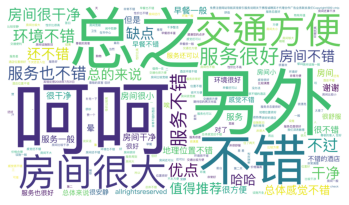

In [4]:
from datasetstore.eda.text import wordcloud

wordcloud(dataset.filter(lambda x: x['review'])['review'])

### 增加 preprocessing 处理过程函数

In [6]:
from datasetstore.preprocess import preprocessing

def a(x):
    #print(x)
    pass

def b(x):
    pass

def c(x):
    pass

preprocessing(dataset, [a, b, c])

正在执行预处理 a:   0%|                                                         | 0/3 [00:00<?, ?it/s] ?it/s]

  0%|          | 0/7766 [00:00<?, ?ex/s]

正在执行预处理 b:  33%|████████████████▎                                | 1/3 [00:00<00:01,  1.77it/s]

  0%|          | 0/7766 [00:00<?, ?ex/s]

正在执行预处理 c:  67%|████████████████████████████████▋                | 2/3 [00:01<00:00,  2.01it/s]

  0%|          | 0/7766 [00:00<?, ?ex/s]

正在执行预处理 c: 100%|█████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.02it/s]


Dataset({
    features: ['label', 'review'],
    num_rows: 7766
})

## 中文分词器

### 单字切词器

In [1]:
from datasetstore.preprocess.tokenizer.chinese import CharacterTokenizer

tokenizer = CharacterTokenizer()
tokenizer.train(['你好吗'])

In [2]:
tokenizer.get_vocab()

{'[UNK]': 0, '吗': 1, '好': 3, '你': 2}

In [11]:
encode1 = tokenizer('你好吗 哈哈哈')
encode1.ids, encode1.tokens

([3, 1, 2, 0, 0, 0, 0], ['你', '好', '吗', ' ', '哈', '哈', '哈'])

In [12]:
tokenizer.encode_batch(['你好吗 哈哈哈', 'dudu'])

[Encoding(num_tokens=7, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=4, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])]

In [4]:
tokenizer.encode('你好吗 哈哈哈').ids

[2, 1, 0, 0, 0, 0, 0]

In [15]:
tokenizer.encode_batch(['你好吗 哈哈哈', 'dudu'])

[Encoding(num_tokens=7, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]),
 Encoding(num_tokens=4, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])]

In [22]:
encodes = tokenizer(['你好吗 哈哈哈', 'dudu'])

### 结巴(Jieba) 切词器

In [5]:
from datasetstore.preprocess.tokenizer.chinese import JiebaTokenizer

tokenizer = JiebaTokenizer()
tokenizer.train(['我爱北京天安门'])

In [6]:
tokenizer.get_vocab()

{'爱': 1, '我': 2, '天安门': 3, '[UNK]': 0, '北京': 4}

## 把处理好的文本重新转化为数据集

In [24]:
from datasetstore import Dataset

ds = Dataset.from_dict({'text_ids': encodes})

### 数据集张量类型转化

In [26]:
# 数据集转化为 tensorflow 格式张量
tf_ds = ds.with_format('tensorflow')
print('tensorflow:', tf_ds['text_ids'])
# 数据集转化为 pytorch 格式张量
torch_ds = ds.with_format('torch')
print('torch', torch_ds['text_ids'])
# 数据集转化为 numpy 格式张量
numpy_ds = ds.with_format('numpy')
print('numpy:', numpy_ds['text_ids'])

tensorflow: tf.Tensor(
[[3 1 2 0 0 0 0]
 [0 0 0 0 0 0 0]], shape=(2, 7), dtype=int64)
torch tensor([[3, 1, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
numpy: [[3 1 2 0 0 0 0]
 [0 0 0 0 0 0 0]]


### 带 padding 的处理

In [20]:
tokenizer.enable_padding()
encodes = tokenizer(['你好吗 哈哈哈', 'dudu'])
encodes

[[3, 1, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]

In [27]:
ds = Dataset.from_dict({'text_ids': encodes})

tf_ds = ds.with_format('tensorflow')
print('tensorflow:', tf_ds['text_ids'])

tensorflow: tf.Tensor(
[[3 1 2 0 0 0 0]
 [0 0 0 0 0 0 0]], shape=(2, 7), dtype=int64)
